Program Assignment 1 Machine Learning
2023-2024 odd
Create a machine-learning model based on the dataset that has been assigned to you.
You can choose either regression or classification problems on the given dataset. Your
jupyter notebook submission should include:
1. Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.
2. Data Preprocessing (10 points): Explain what are the preprocessing techniques
that you apply and why you need these techniques
3. Data Analysis (10 points): Explain your understanding of the data pattern. You
can explain the insight that you get from the data
4. Model Generation (30 points): Create your model and describe the algorithm
that you use. Explain why you chose this model
5. Model Evaluation (20 points): Explain the results of your model

Marsha Alexis Likorawung 0706012110034

Evelyn Callista Yaurentius 0706012110036

**1. Problem and Task Understanding (30 points): Explain the problem you want to
solve, and be specific about the machine learning task, whether it is a classification
problem or regression problem.**


Problem and Task Understanding : The problem we want to solve is to predict weather the customer going to churn or not. This problems treated as a classification problem because : 

1. The outcome is binary: which is either the customer churn (Yes/No)
2. Classification algorithm are designed to handle categorical or discrete outcome such as predicting classes or labels
3. The model selection for machine learning would be logistic regression. Logistic prediction is used to predict the dependent variable


**Dataset Customer Churn**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data, from marsha's github (the csv file is imported to github for easier and online access to the dataset)
url = "https://raw.githubusercontent.com/Marsh16/customer-churn/main/Customer%20Churn%20-%20Dataset.csv"
data = pd.read_csv(url)

#show all columns 
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
#hi 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService OnlineSecurity  \
0                0              1                0             No 

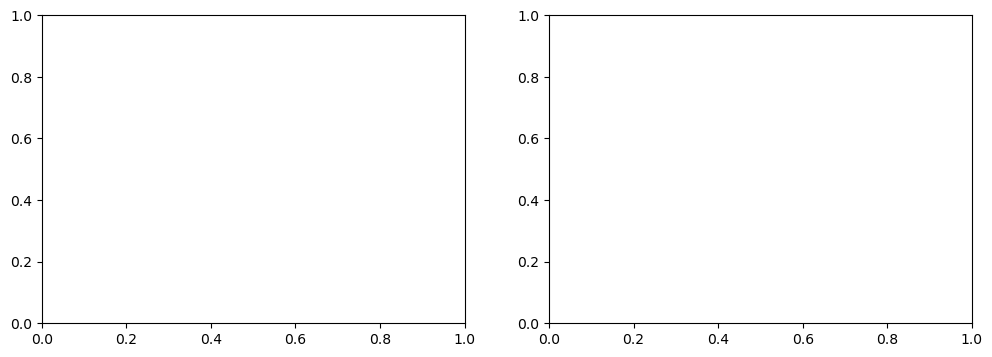

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder2.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder2.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder2.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder2.fit_transform(data['InternetService'])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Show the plots
print(data)

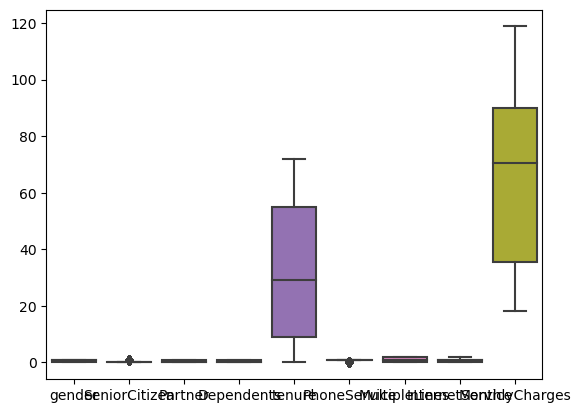

In [9]:


# Fit and transform the categorical data
# encoded_labels = label_encoder.fit_transform(data['gender'])

sns.boxplot(data=data)
plt.show()